# General view of dataset

In this context, I would assume that train set will be bigml-80 and test set will be bigml-20.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('Copy of churn-bigml-20.csv')
train = pd.read_csv('Copy of churn-bigml-80.csv')

In [3]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Descriptive Analysis

In [6]:
train['Churn'] = train['Churn'].map({True: 1, False: 0})
test['Churn'] = test['Churn'].map({True: 1, False: 0})

#### Churn Distribution

Text(0, 0.5, 'Count')

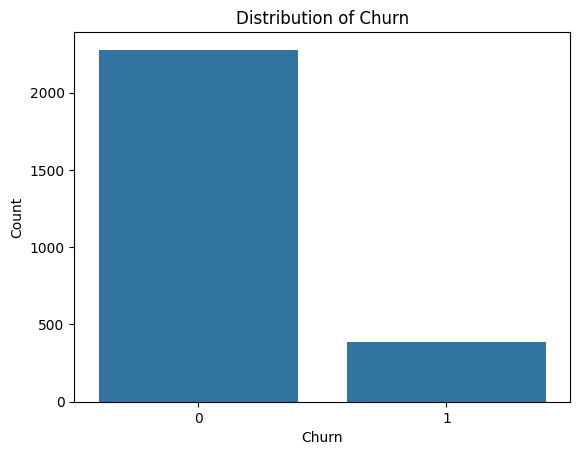

In [7]:
# Descriptive statistics analysis
# 1. Check the distribution of the target variable
sns.countplot(x='Churn', data=train)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

As can be seen that, there is a significant imbalance between churn and not churn. Therefore, in order to make the models interpret the most clearly, I would use `SMOTE` to upsample train sets.

# Key questions

## What is the significance of Churn Rate for stakeholders (Customers, MCI, etc.)?
The Churn Rate is a critical business metric that measures the percentage of customers who stop using a company’s services over a specific period. Its significance for stakeholders, such as customers and MCI (a telecommunications company), includes:

- For Customers:
    - Churn rate reflects customer satisfaction and service quality. A high churn rate may indicate dissatisfaction due to poor service, high costs, or better alternatives elsewhere, prompting customers to switch providers.
    - Understanding churn helps customers indirectly, as companies like MCI may improve services, offer better pricing, or enhance customer support to retain them.
- For MCI (the Company):
    - Financial Impact: Retaining existing customers is 5–25 times less expensive than acquiring new ones. High churn rates lead to revenue loss and increased marketing costs to replace lost customers.
    - Customer Lifetime Value (CLV): Churn reduces CLV, as long-term customers generate more revenue through subscriptions and upsell opportunities. Reducing churn maximizes CLV.
    - Operational Efficiency: By identifying at-risk customers, MCI can focus retention efforts (e.g., targeted promotions, improved support) on high-value customers, optimizing resource allocation.
    - Competitive Positioning: A low churn rate signals strong customer loyalty and service quality, giving MCI a competitive edge in the telecommunications market.
- For Other Stakeholders (e.g., Investors, Employees):
    - Investors view low churn as a sign of business stability and growth potential, impacting stock value and investment decisions.
    - Employees benefit from a stable customer base, as it supports job security and opportunities for performance-based incentives.
    - By monitoring and reducing churn, MCI can enhance customer satisfaction, improve profitability, and strengthen its market position.

## What are the characteristics of each Type of Customer (Churn or Not Churn)?

In [8]:
churn = train[train['Churn'] == 1]
no_churn = train[train['Churn'] == 0]

In [9]:
numerical_cols = ['Account length', 'Number vmail messages', 'Total day minutes', 
                  'Total day calls', 'Total day charge', 'Total eve minutes', 
                  'Total eve calls', 'Total eve charge', 'Total night minutes', 
                  'Total night calls', 'Total night charge', 'Total intl minutes', 
                  'Total intl calls', 'Total intl charge', 'Customer service calls']
categorical_cols = ['State', 'Area code', 'International plan', 'Voice mail plan']

### Numerical Features

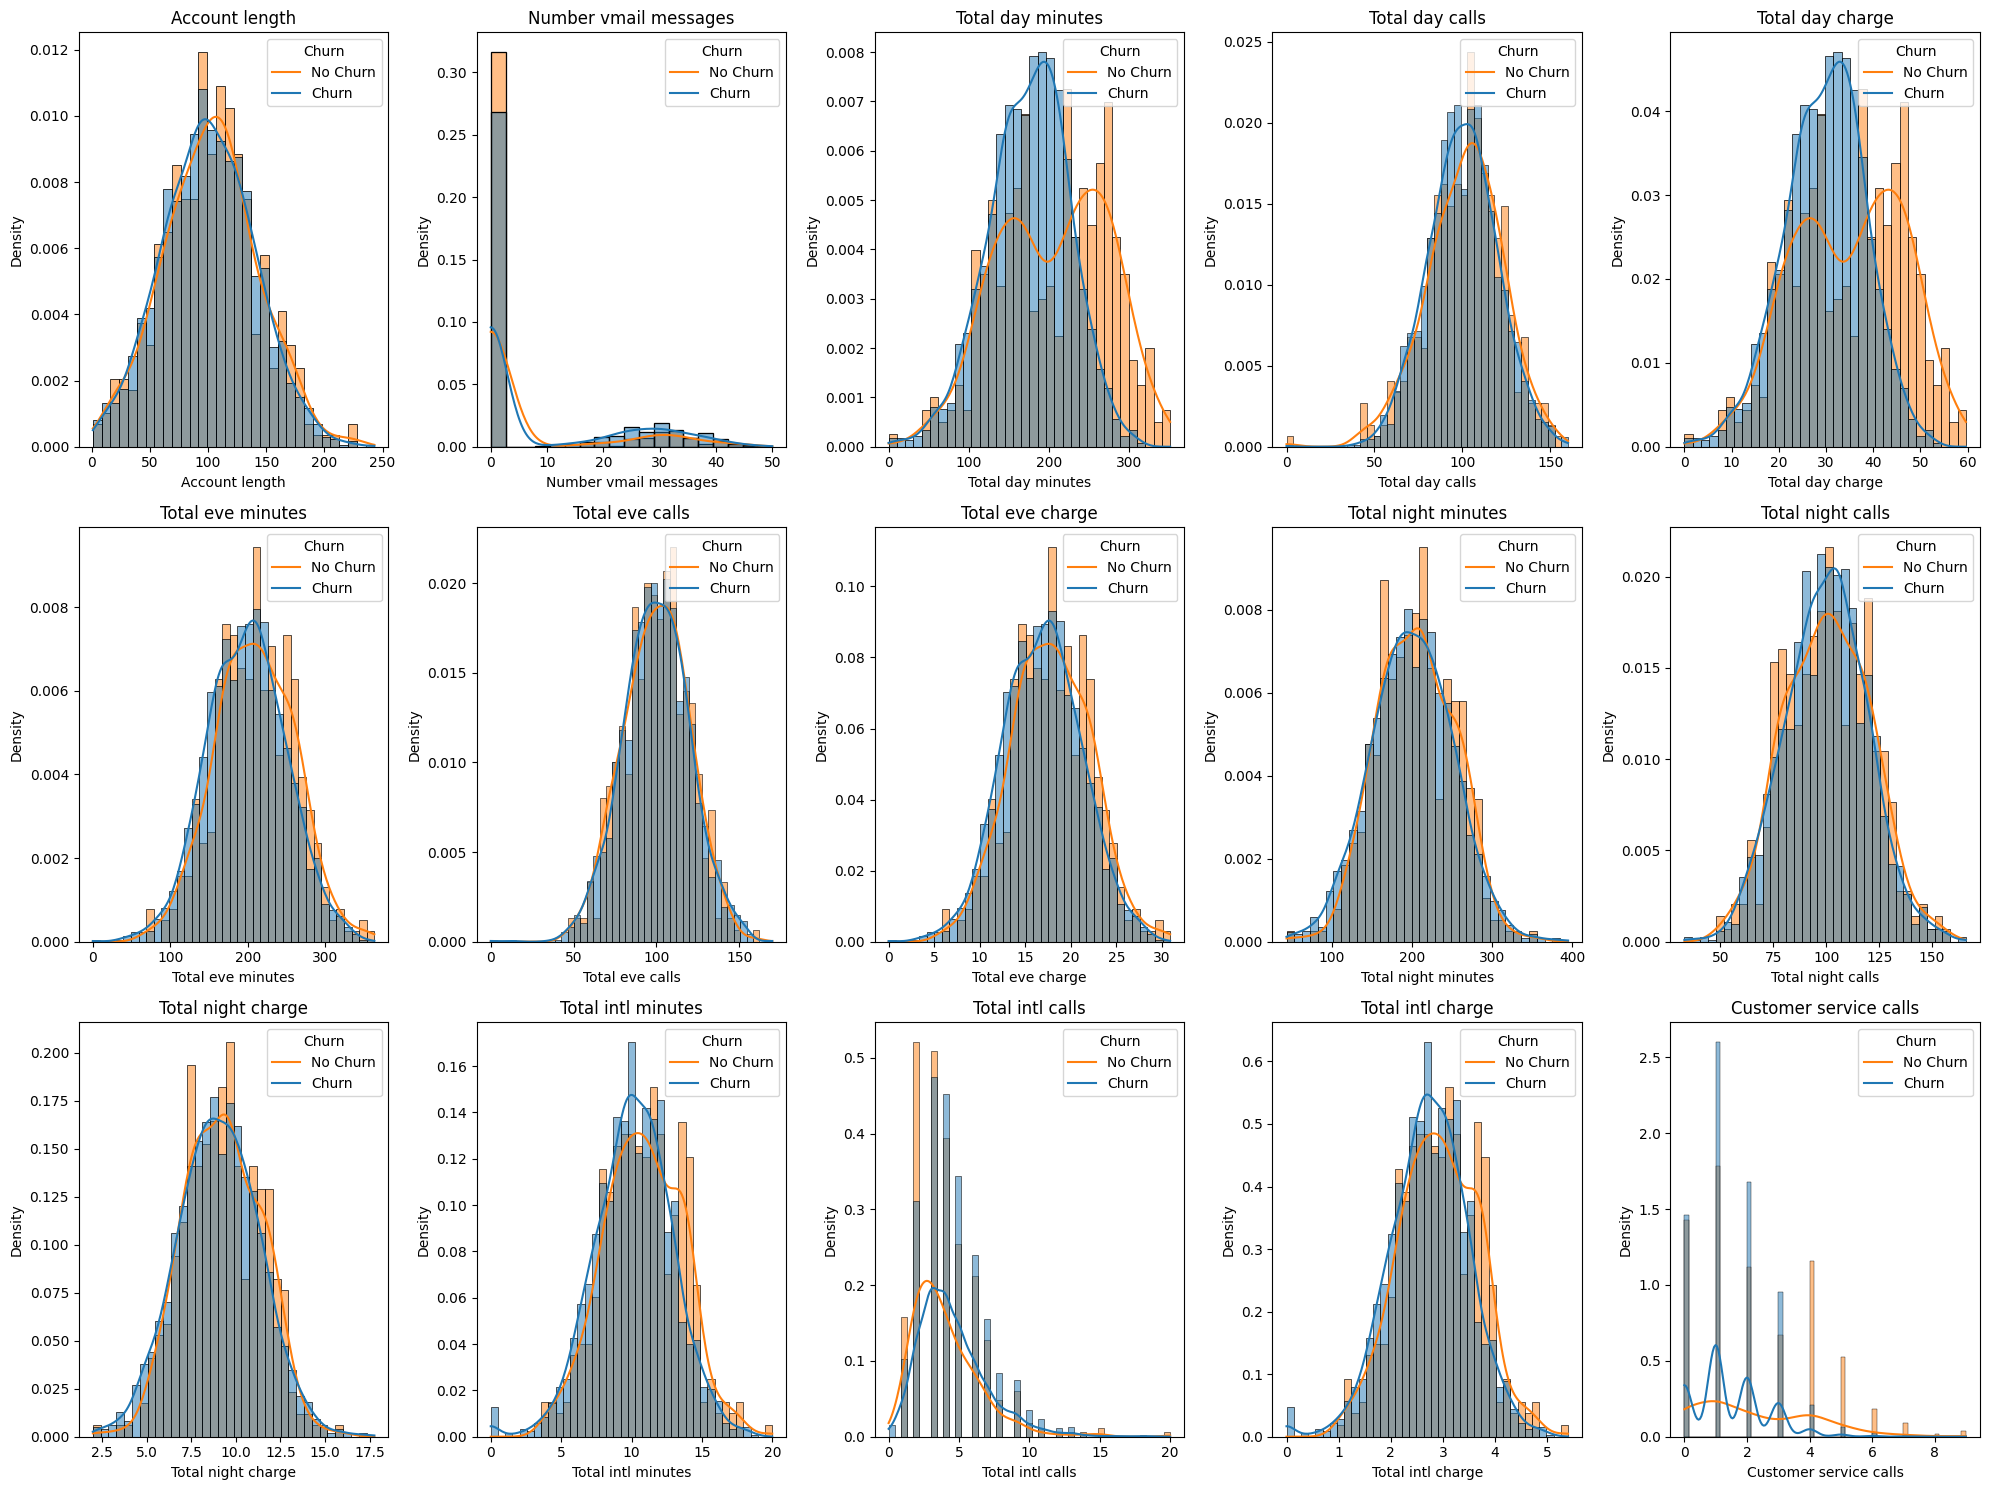

In [10]:
# Combine all numerical feature distributions into one plot

import math

# Calculate the number of rows and columns for subplots
num_cols = 5  # Number of columns in the grid
num_rows = math.ceil(len(numerical_cols) / num_cols)  # Number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(data=train, x=col, hue='Churn', kde=True, stat='density', common_norm=False, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Summary of Characteristics**

- **Churned Customers:**
    - Higher usage and charges: More Total Day Minutes (~210 vs. 180), Total Day Charge (~$35 vs. $30), Total Intl Minutes (~12 vs. 10), and Total Intl Charge (~$3.2 vs. $2.7).
    - More Customer Service Calls (~2–2.5 vs. 1.5), with a notable tail at 4+ calls.
    - Slightly higher evening usage (Total Eve Minutes ~210 vs. 200, Total Eve Charge ~$18 vs. $17).
    - Less likely to use voicemail (lower Number vmail messages, mean ~5 vs. 8–10).
    - Similar account length, call frequencies (day, evening, night), and night usage/charges.
- **Non-Churned Customers:**
    - Lower usage and charges: Total Day Minutes (~180), Total Day Charge (~$30), Total Intl Minutes (~10), Total Intl Charge (~$2.7).
    - Fewer Customer Service Calls (mean ~1.5, mostly 0–2 calls).
    - More likely to use voicemail (higher Number vmail messages, mean ~8–10).
    - Similar account length, call frequencies, and night usage/charges.

---
**Key Insights**
- **Cost Sensitivity:** Churned customers have higher daytime and international charges, suggesting cost is a major churn driver.
- **Service Issues:** More customer service calls among churned customers indicate dissatisfaction or unresolved complaints.
- **Engagement:** Lower voicemail usage among churned customers suggests they are less engaged with value-added services.
- **Usage Patterns:** Higher daytime and international usage among churned customers may lead to bill shock, prompting them to switch providers.

### Categorical Features

#### State

Text(0.5, 1.0, 'Distribution of States')

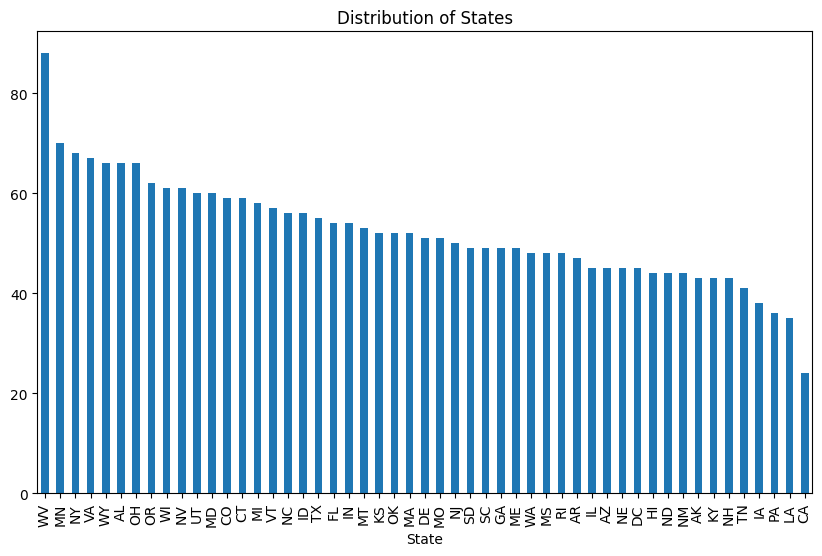

In [11]:
plt.figure(figsize=(10, 6))
train['State'].value_counts().plot(kind='bar')
plt.title('Distribution of States')

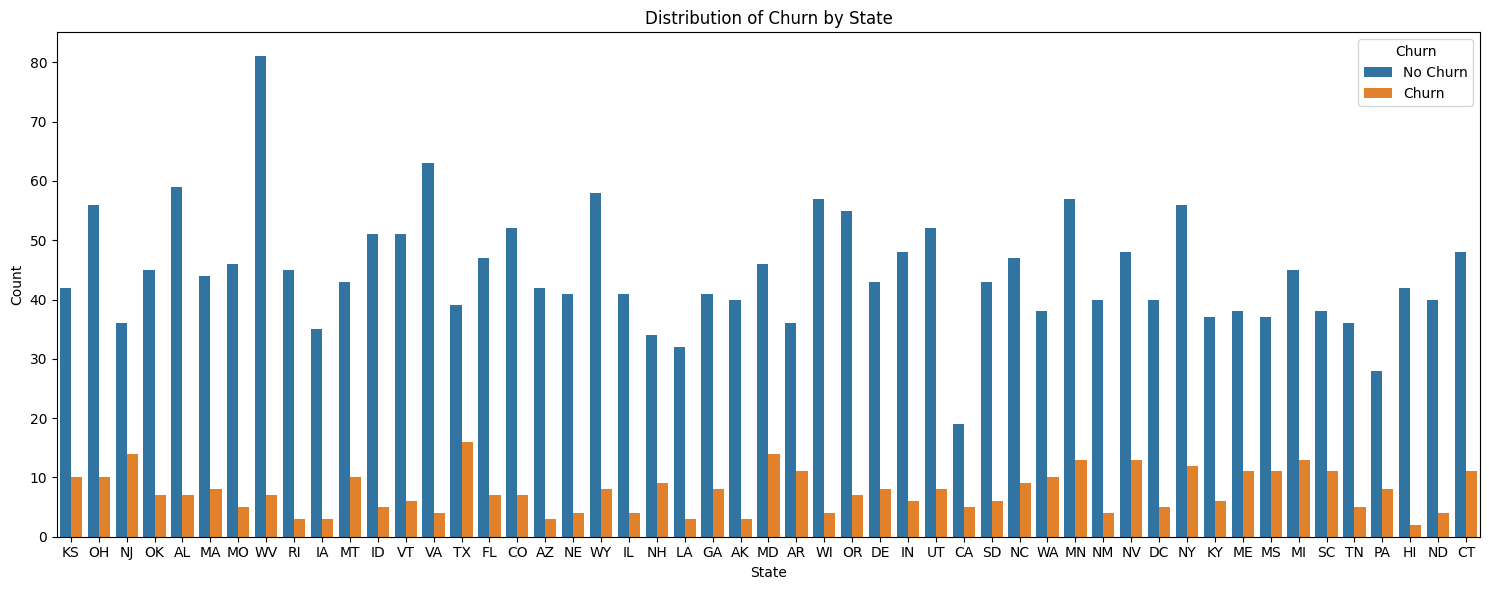

In [12]:
# Plotting State 
plt.figure(figsize=(15, 6))
sns.countplot(data=train, x='State', hue='Churn')
plt.title('Distribution of Churn by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.tight_layout()
plt.show()
    

**Churned Customers:**
- More prevalent in states like NJ, TX, MD, WA, and CA, where churn rates range from 25% to 50%.
- Likely influenced by regional competition, service quality issues, or cost sensitivity.

**Non-Churned Customers:**
- More prevalent in states like HI, AK, VA, IA, and RI, where churn rates are 5–8%.
- Likely benefit from better service quality, fewer competitors, or higher loyalty.

#### Other features

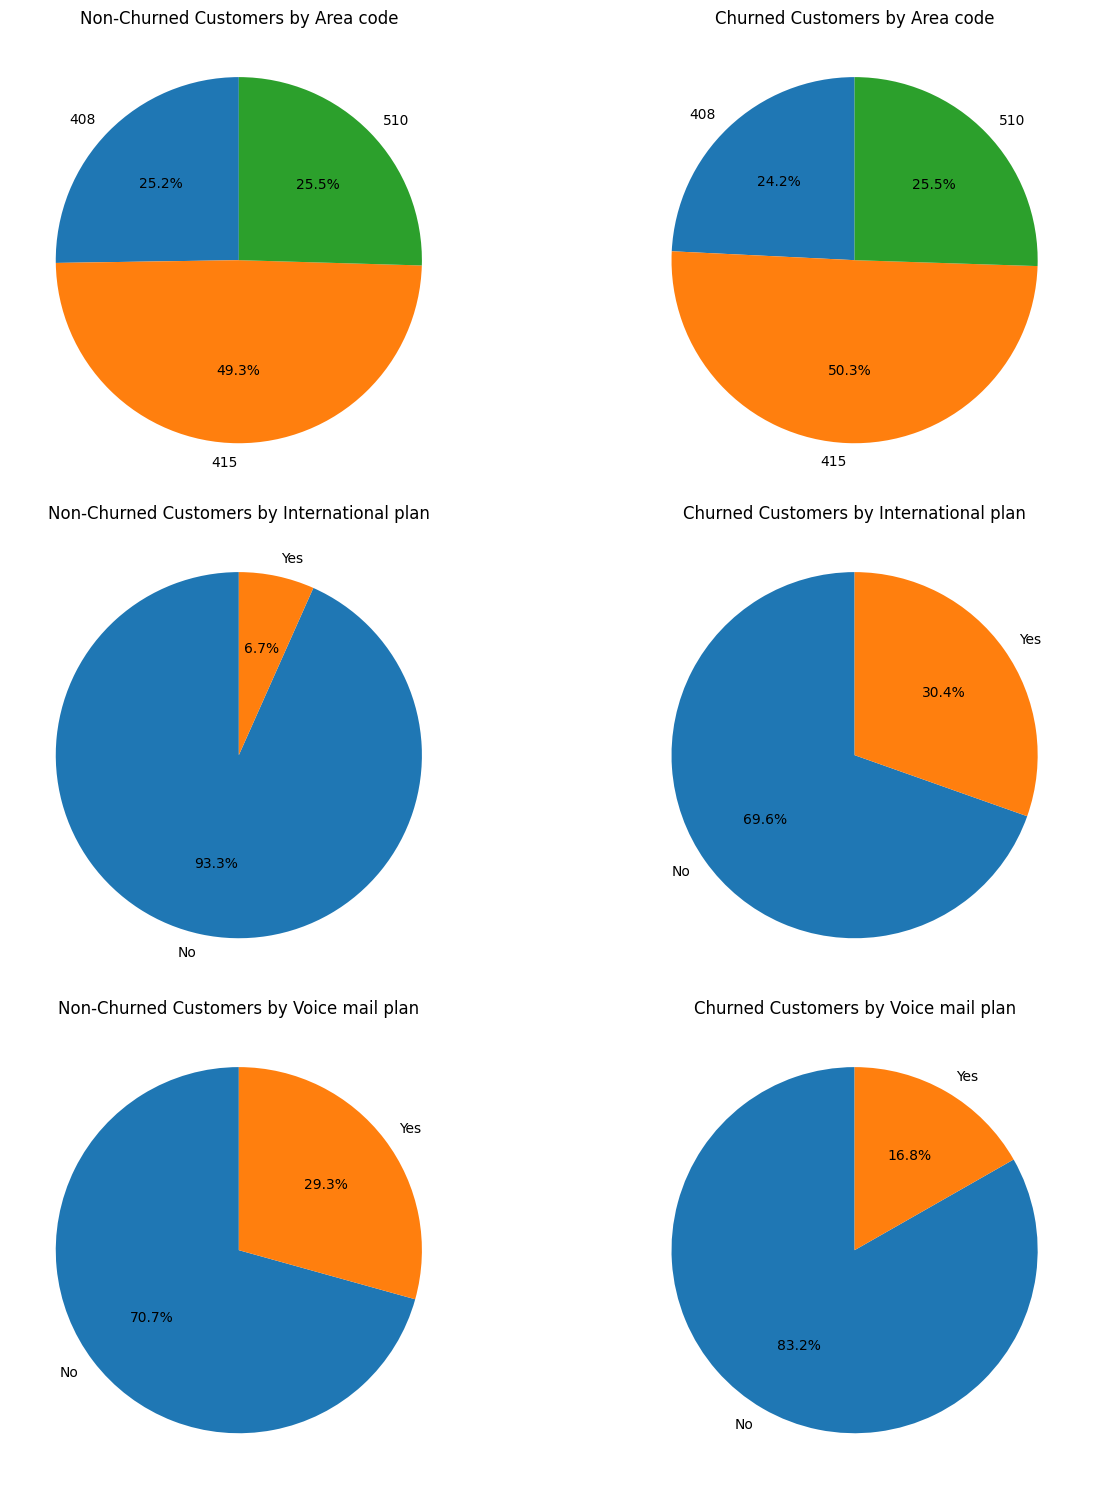

In [13]:
categorical_cols = ['Area code', 'International plan', 'Voice mail plan']

# Create subplots for each categorical column
fig, axes = plt.subplots(len(categorical_cols), 2, figsize=(14, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    # Group data by the column and Churn
    col_counts = train.groupby([col, 'Churn']).size().unstack()

    # Pie chart for non-churned customers
    axes[i, 0].pie(col_counts[0], labels=col_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i, 0].set_title(f'Non-Churned Customers by {col}')

    # Pie chart for churned customers
    axes[i, 1].pie(col_counts[1], labels=col_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i, 1].set_title(f'Churned Customers by {col}')

plt.tight_layout()
plt.show()


**Summary of Characteristics**
- **Churned Customers:**
    - Area Code: Similar distribution to non-churned (415: 50.3%, 408: 24.2%, 510: 25.5%), with churn rates of 14.5%–15.2%. Area code is not a strong predictor of churn.
    - International Plan: Much more likely to have an international plan (30.4% vs. 6.7% for non-churned). Churn rate for those with an international plan is very high (44.5%).
    - Voice Mail Plan: Less likely to have a voice mail plan (16.8% vs. 29.3% for non-churned). Churn rate is higher without a voice mail plan (17.2% vs. 9.2%).
    - State (from previous analysis): More likely to be from high-churn states like NJ (~50%), TX (~25%), MD (~25%), WA (~25%), and CA (~25%).
- **Non-Churned Customers:**
    - Area Code: Evenly distributed (415: 49.3%, 408: 25.2%, 510: 25.5%), with churn rates close to the overall average.
    International Plan: Rarely have an international plan (6.7%), with a lower churn rate (11.6%) for those without.
    - Voice Mail Plan: More likely to have a voice mail plan (29.3%), which correlates with a lower churn rate (9.2%).
    State (from previous analysis): More likely to be from low-churn states like HI (~5%), AK (~5%), VA (~8%), IA (~5%), and RI (~6%).

--- 

**Key Insights**
- **International Plan as a Churn Driver:**
    - Customers with an international plan have a 44.5% churn rate, compared to 11.6% for those without. This is a major differentiator, suggesting issues like high costs or poor service quality for international plans.
- **Voice Mail Plan as a Retention Tool:**
    - Customers with a voice mail plan have a lower churn rate (9.2% vs. 17.2%). Offering or promoting voice mail plans could enhance engagement and reduce churn.
- **Area Code Not a Factor:**
    - Churn rates across area codes are nearly identical (14.5%–15.2%), indicating that geographic area codes don’t significantly influence churn behavior.
- **State-Level Variations:**
    - High churn in states like NJ, TX, and CA may reflect regional competition or service issues, while low churn in HI, AK, and VA suggests stronger customer loyalty or better service quality.

### Summary
**Churned Customers**

- **Numerical:** Higher usage/charges (Total Day Minutes ~210 vs. 180, Charge ~$35 vs. $30; Intl Minutes ~12 vs. 10, Charge ~$3.2 vs. $2.7); more customer service calls (~2–2.5 vs. 1.5); lower voicemail usage (~5 vs. 8–10 messages).
- **Categorical:** 30.4% have international plan (churn rate 44.5%); 16.8% have voice mail plan (churn rate 17.2% without); evenly distributed across area codes (churn rates ~14.5%–15.2%); more in high-churn states (NJ ~50%, TX ~25%).

**Non-Churned Customers**

- **Numerical:** Lower usage/charges (Day Minutes ~180, Charge ~$30; Intl Minutes ~10, Charge ~$2.7); fewer service calls (~1.5); higher voicemail usage (~8–10 messages).
- **Categorical:** 6.7% have international plan (churn rate 11.6% without); 29.3% have voice mail plan (churn rate 9.2%); evenly distributed across area codes; more in low-churn states (HI ~5%, AK ~5%).
----
**Key Observations**

- Cost Sensitivity: Higher usage/charges drive churn (bill shock).
- Service Issues: More service calls signal dissatisfaction in churned customers.
- Engagement: Churned customers use voicemail less, international plans more.
- Regional Impact: High churn in NJ, TX; low in HI, AK.
- Plan Impact: International plans increase churn (44.5%); voice mail plans reduce it (9.2% vs. 17.2%).

## Which ML modeling can be implemented and represent model results? including features input and explaining features important.

#### Check missing values

In [14]:
# Check for missing values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print("Missing values in the dataset:")
    print(missing_values)

So there are no missing values here.

#### Check outliers

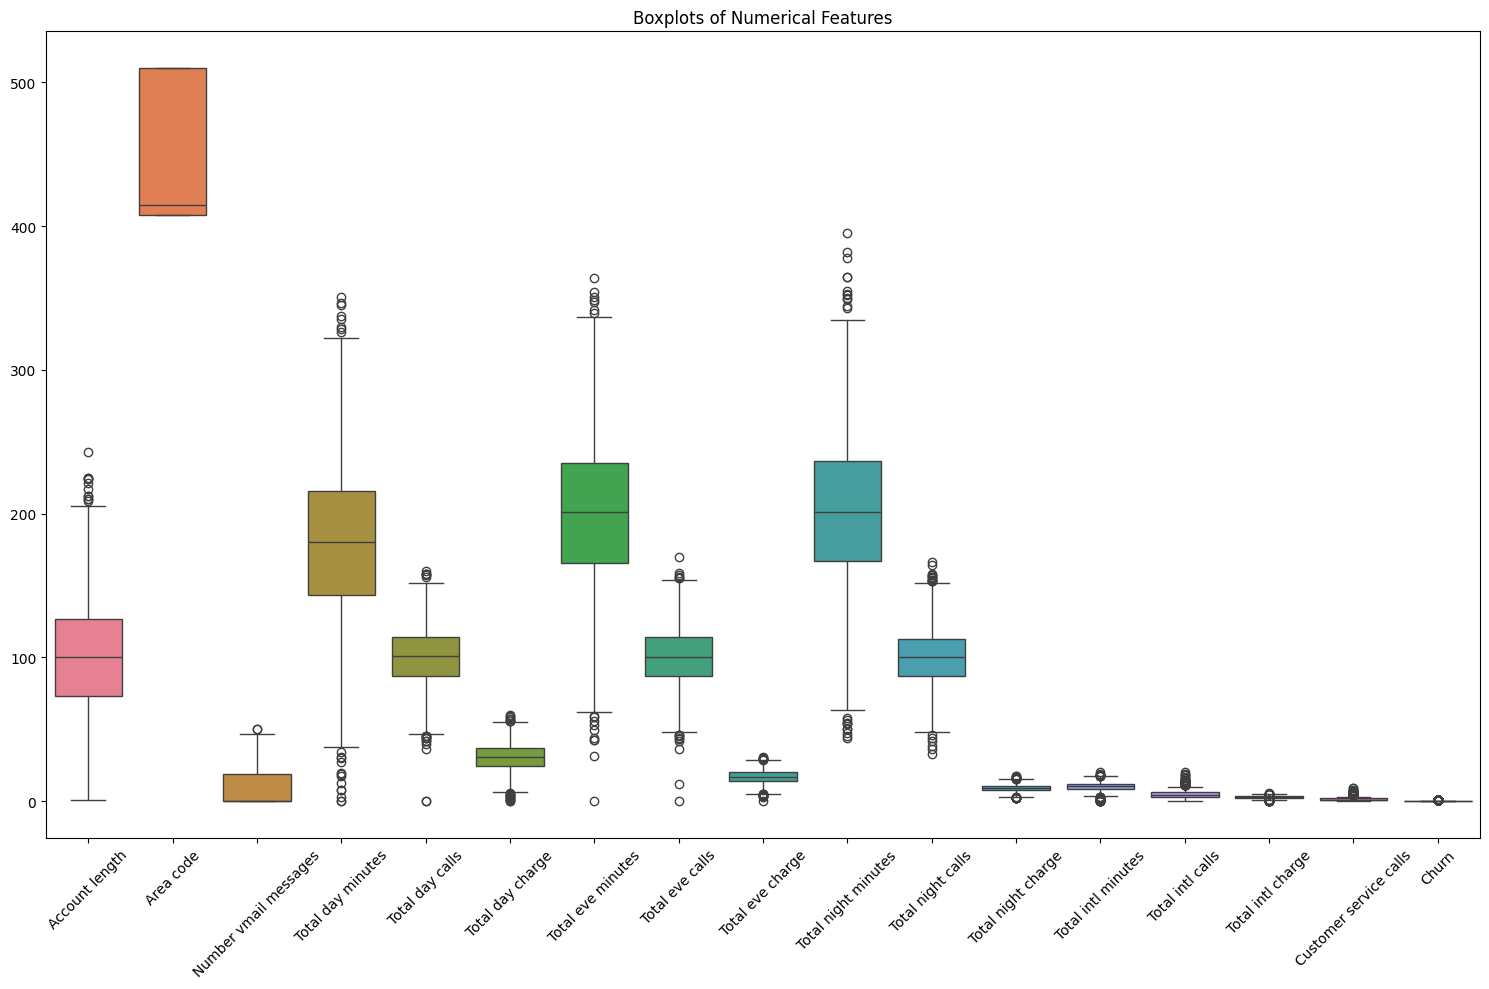

In [15]:
# Check outliers by using boxplots
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15, 10))
sns.boxplot(data=train[numerical_cols])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
    

Although there are outliers in some features, I knew that this is customer information, therefore the fact that each individual has the unique value of each features is unavoidable and common. So, I kept these outliers to maintain the variety of dataset and help models to learn specific customers.

#### Numerical Features Selection

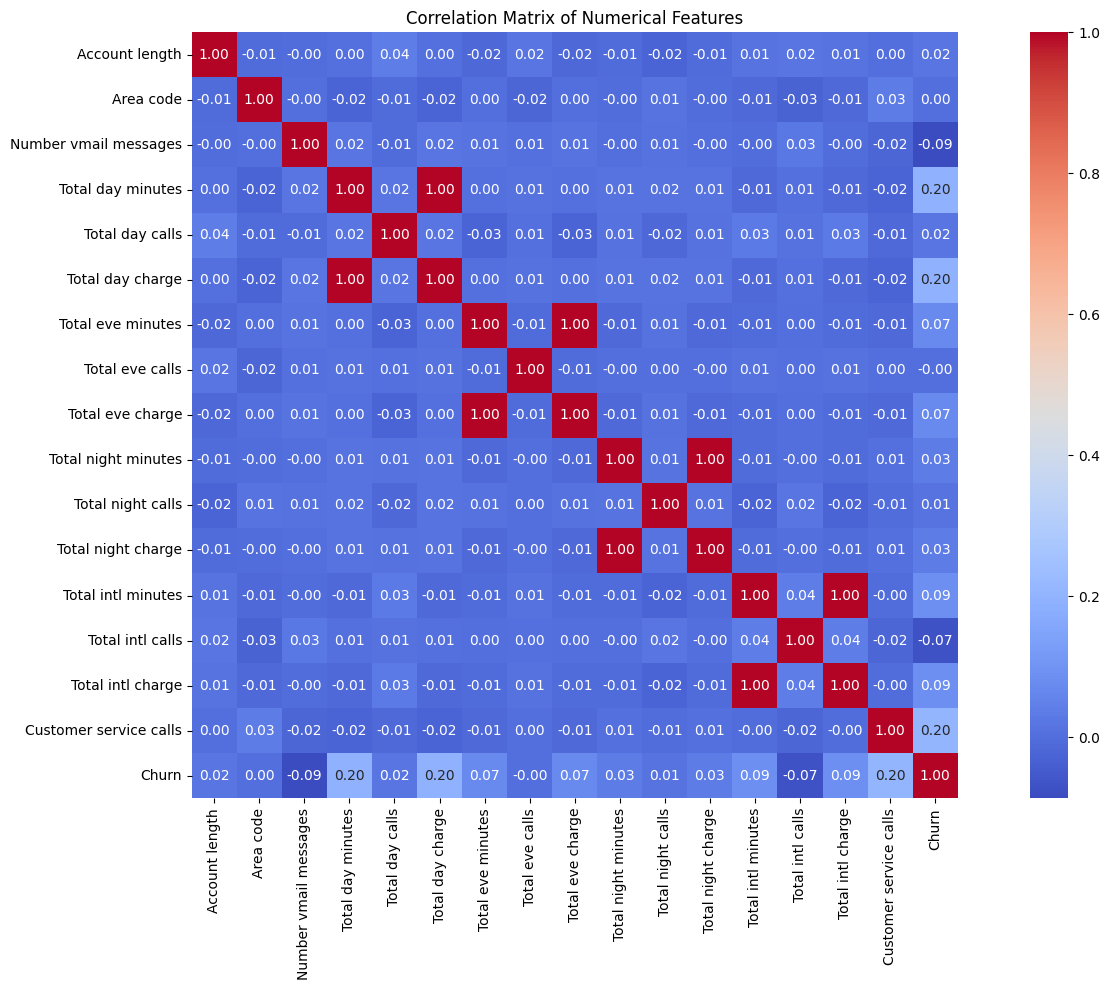

In [16]:
# Heatmap for correlation matrix
plt.figure(figsize=(15, 10))

correlation_matrix = train[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

c:\Users\Welcome\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Features with significant differences (P-Value < 0.05):
                   Feature       P-Value
13        Total intl calls  3.050806e-04
8         Total eve charge  1.652419e-04
6        Total eve minutes  1.647968e-04
12      Total intl minutes  8.303771e-06
14       Total intl charge  8.278993e-06
2    Number vmail messages  7.777075e-06
3        Total day minutes  2.023431e-24
5         Total day charge  2.022321e-24
15  Customer service calls  4.318653e-26
16                   Churn  0.000000e+00


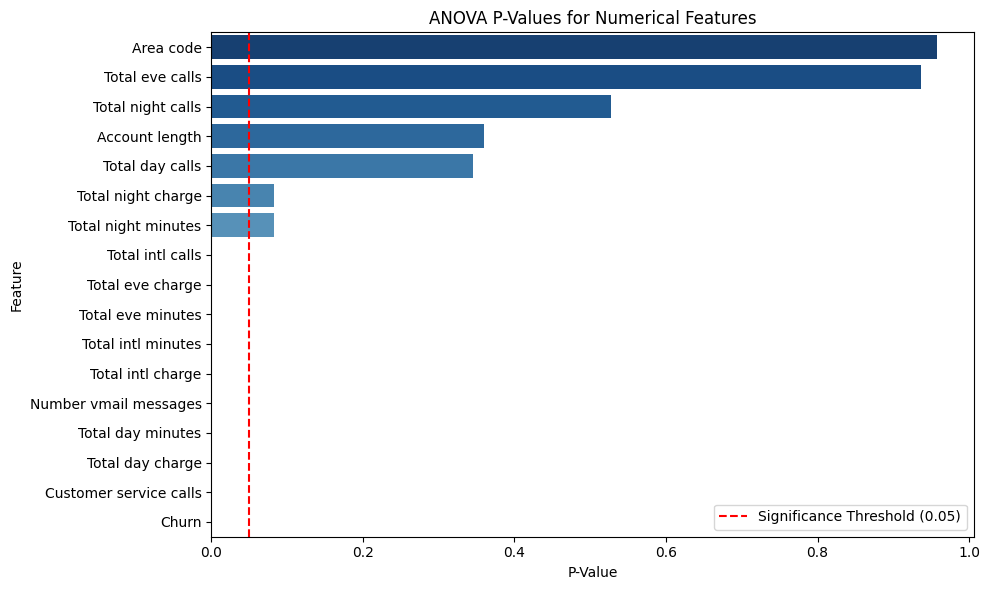

In [17]:
# ANOVA test for categorical features
from scipy.stats import f_oneway

# Perform ANOVA for each numerical feature
anova_results = {}
for col in numerical_cols:
    churned = train[train['Churn'] == 1][col]
    not_churned = train[train['Churn'] == 0][col]
    f_stat, p_value = f_oneway(churned, not_churned)
    anova_results[col] = p_value

# Convert results to a DataFrame
anova_df = pd.DataFrame(list(anova_results.items()), columns=['Feature', 'P-Value'])

# Sort by P-Value
anova_df = anova_df.sort_values(by='P-Value', ascending=False)

# Display features with significant differences (P-Value < 0.05)
print("Features with significant differences (P-Value < 0.05):")
print(anova_df[anova_df['P-Value'] < 0.05])

# Plot the P-Values
plt.figure(figsize=(10, 6))
sns.barplot(x='P-Value', y='Feature', data=anova_df, palette='Blues_r', hue = 'Feature')
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title('ANOVA P-Values for Numerical Features')
plt.xlabel('P-Value')
plt.ylabel('Feature')
plt.legend()
plt.tight_layout()
plt.show()

**Features to Choose**
- **Significant Features (P-Value < 0.05):**

    - Customer service calls: Highly significant (P-Value < 0.05) and has a strong correlation with Churn (0.20).
    - Total day minutes: Significant (P-Value < 0.05) and has a strong correlation with Churn (0.20).
    - Number vmail messages: Significant (P-Value < 0.05) and provides unique information (low correlation with other features).
- **Remove Redundant Features:**

    - From the correlation matrix, features like Total day charge, Total eve charge, Total night charge, and Total intl charge are perfectly correlated with their respective "minutes" features. Keep only the "minutes" features:
        - Keep Total day minutes (drop Total day charge).
        - Keep Total eve minutes (drop Total eve charge).
        - Keep Total night minutes (drop Total night charge).
        - Keep Total intl minutes (drop Total intl charge).
- **Drop Insignificant Features (P-Value ≥ 0.05):**

    - Features like Area code, Total eve calls, Total night calls, and Total intl calls have high P-Values and are not significant predictors of Churn.
---
**Final Selected Features**

- Customer service calls
- Total day minutes
- Number vmail messages
- Total eve minutes
- Total night minutes
- Total intl minutes
- Account length (optional, as it has a moderate P-Value but may still provide useful information)

#### Categorical Feature Selection
- In this problem, I saw that target is categorical which only has True or False. Therefore, I would use `Chi-square`.

In [18]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables

international_plan_encoder = LabelEncoder()
voice_mail_plan_encoder = LabelEncoder()
train['International plan'] = international_plan_encoder.fit_transform(train['International plan'])
train['Voice mail plan'] = voice_mail_plan_encoder.fit_transform(train['Voice mail plan'])
test['International plan'] = international_plan_encoder.transform(test['International plan'])
test['Voice mail plan'] = voice_mail_plan_encoder.transform(test['Voice mail plan'])

# Perform Chi-Square test
chi_scores = chi2(train[['Area code', 'International plan', 'Voice mail plan']], train['Churn'])
chi_scores_df = pd.DataFrame({'Feature': ['Area code', 'International plan', 'Voice mail plan'], 
                              'Chi2 Score': chi_scores[0], 
                              'P-Value': chi_scores[1]})
print(chi_scores_df)

              Feature  Chi2 Score       P-Value
0           Area code    0.011435  9.148420e-01
1  International plan  184.492057  5.066257e-42
2     Voice mail plan   19.056720  1.268902e-05


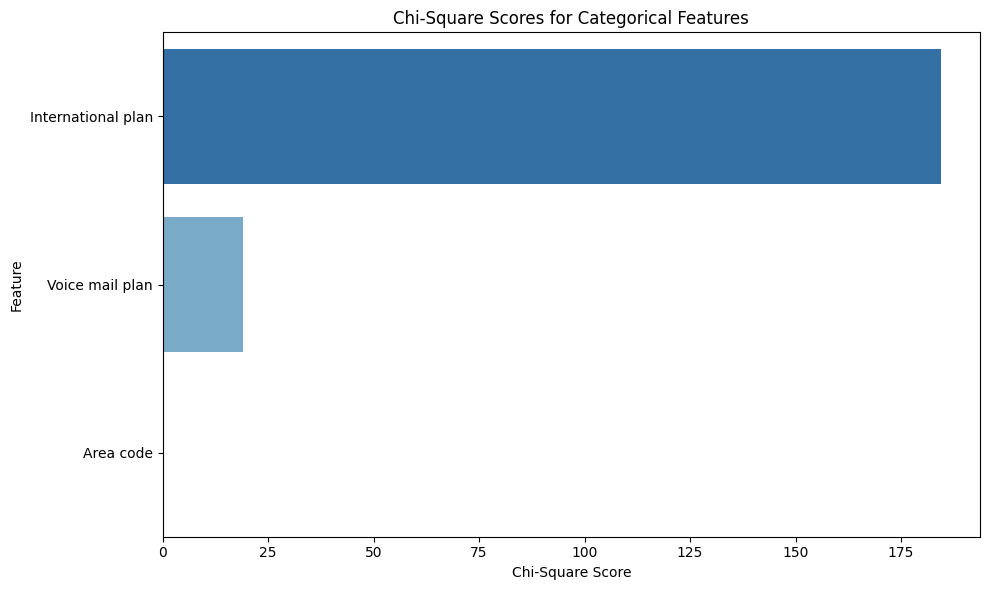

In [19]:
# Sort the data in ascending order
chi_scores_df = chi_scores_df.sort_values(by='Chi2 Score', ascending=False)

# Plot the Chi-Square scores with a custom color
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi2 Score', y='Feature', data=chi_scores_df, palette='Blues_r', hue='Feature')
plt.title('Chi-Square Scores for Categorical Features')
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

From the p-val and chi score, it is easy to remove Area code.

#### Data Preparation

- Feature Engineering: From previous EDA, I knew that `Total day minutes`, `Total day charge`, `Customer service calls` had the strongest correlation with target. Therefore, I will enhance these features by adding squared values of these.

In [20]:
high_correlation = ['Total day minutes', 'Total day charge', 'Customer service calls']
for col in high_correlation:
    # Create polynomial features
    train[f'{col}_squared'] = train[col] ** 2
    test[f'{col}_squared'] = test[col] ** 2
    
# train['DayMinutes_ServiceCalls'] = train['Total day minutes'] * train['Customer service calls']
# train['IntlPlan_IntlCharge'] = train['International plan'] * train['Total intl charge']
# test['DayMinutes_ServiceCalls'] = test['Total day minutes'] * test['Customer service calls']
# test['IntlPlan_IntlCharge'] = test['International plan'] * test['Total intl charge']

- Scaling: To make all features in equal units, also to reduce skewness and outliers.
Also, all features have normal distribution therefore, Standard Scaling is the best option.

In [21]:
from sklearn.preprocessing import StandardScaler

# Select features based on ANOVA and Chi-Square results
selected_features = ['Account length', 'Total day minutes', 'Total eve minutes', 
                     'Total night minutes', 'Total intl minutes', 'Customer service calls', 'Number vmail messages', 
                     'International plan', 'Voice mail plan', 'Total day minutes_squared', 'Total day charge_squared']
# standardize the features
scaler = StandardScaler()
numerical_features = ['Account length', 'Total day minutes', 'Total eve minutes', 
                     'Total night minutes', 'Total intl minutes', 'Customer service calls', 'Number vmail messages','Total day minutes_squared', 'Total day charge_squared', 'Customer service calls_squared']
train[numerical_features] = scaler.fit_transform(train[numerical_features])
test[numerical_features] = scaler.transform(test[numerical_features])

#### Data Oversampling
- Since from the previous EDA, we knew that target feature are imbalanced, so I used SMOTE to create the balanced dataset for models to learn.

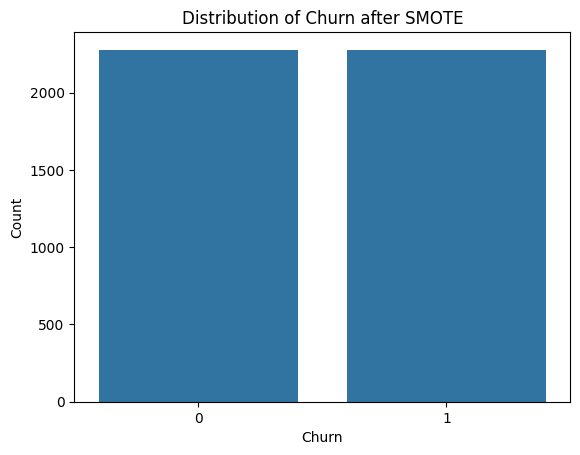

In [22]:
# Over sampling the minority class
from imblearn.over_sampling import SMOTE
train = train[selected_features + ['Churn']]
X = train.drop('Churn', axis=1)
y = train['Churn']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Check the distribution of the target variable after SMOTE
sns.countplot(x=y_resampled)
plt.title('Distribution of Churn after SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Now the dataset is balanced already, time to model.

In [23]:
X_test = test[selected_features]
y_test = test['Churn']


#### Modelling
- First of all, we chose ensemble and gradient boosting since these are the most powerful models and time-efficient.
- Also to hyper-tune, I used Optuna, instead of GridSearchCV or RandomSearch because these methods are time-consuming.


In [24]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import optuna
models_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']
Metrics = {
    'Model': models_names,
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Specificity': [],
    'Recall': [],
    'AUC': []
}

c:\Users\Welcome\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
# def objective(trial):
#     # Define the hyperparameters to be tuned
#     params = {
#         'max_depth': trial.suggest_int('max_depth', 1, 10),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
#     }
#     # Create the model
#     model = DecisionTreeClassifier(**params, random_state=42)
#     # Fit the model
#     model.fit(X_resampled, y_resampled)
#     # Make predictions
#     y_pred = model.predict(X_test)
#     # Calculate accuracy    
#     score = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     # Calculate the ROC AUC score
#     roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
#     return f1 

# study_dt = optuna.create_study(direction='maximize')
# study_dt.optimize(objective, n_trials=50)
# best_params = study_dt.best_params
# best_score = study_dt.best_value
# print(f"Best parameters: {best_params}")
# print(f"Best score: {best_score}")



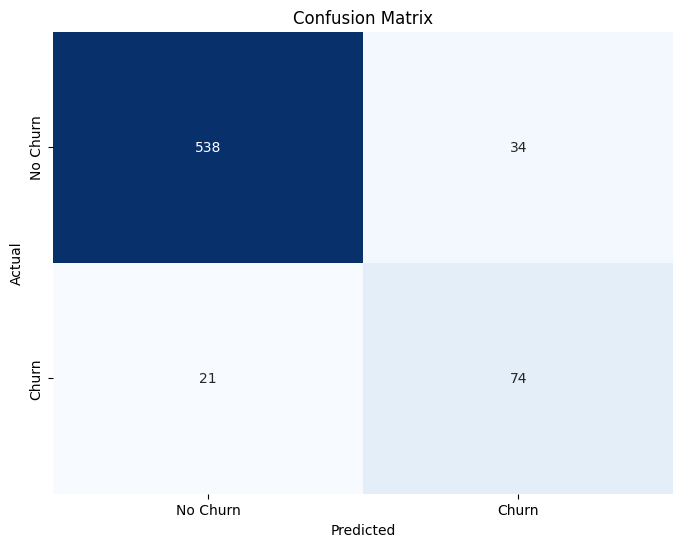

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.96      0.94      0.95       572
       Churn       0.69      0.78      0.73        95

    accuracy                           0.92       667
   macro avg       0.82      0.86      0.84       667
weighted avg       0.92      0.92      0.92       667

ROC AUC Score: 0.8793


In [26]:
dt_params =  {'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 9}
dt_model = DecisionTreeClassifier(**dt_params, random_state=42)
dt_model.fit(X_resampled, y_resampled)
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
auc = roc_auc_score(y_test, y_pred_proba)
Metrics['Accuracy'].append(accuracy)
Metrics['F1 Score'].append(f1)
Metrics['Precision'].append(precision)
Metrics['Specificity'].append(specificity)
Metrics['Recall'].append(recall)
Metrics['AUC'].append(auc)

# Print the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'])
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Print the ROC AUC score
print(f"ROC AUC Score: {auc:.4f}")

- Random Forest

In [27]:
# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# def objective_rf(trial):
#     # Define the hyperparameters to tune
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 200),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
#         'random_state': 42,
#     }

#     # Create the model
#     model = RandomForestClassifier(**params)

#     # Fit the model
#     model.fit(X_resampled, y_resampled)

#     # Make predictions
#     y_pred = model.predict(X_test)
    
#     # Calculate the score
#     score = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     # Calculate the ROC AUC score
#     roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
#     # print(f"Trial: {trial.number}, Accuracy: {score}, ROC AUC: {roc_auc}", params)
    
    

#     return f1

# # Create a study object
# study_rf = optuna.create_study(direction='maximize')
# # Optimize the hyperparameters
# study_rf.optimize(objective_rf, n_trials=50)

# # Print the best hyperparameters
# print("Best hyperparameters: ", study_rf.best_params)



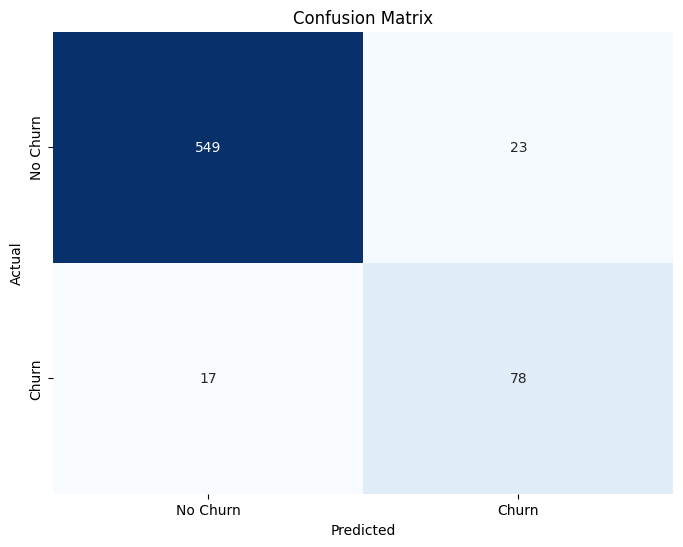

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.97      0.96      0.96       572
       Churn       0.77      0.82      0.80        95

    accuracy                           0.94       667
   macro avg       0.87      0.89      0.88       667
weighted avg       0.94      0.94      0.94       667

ROC AUC Score: 0.8922


In [28]:
# Train the model with the best hyperparameters
rf_params ={'n_estimators': 158, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
best_model_rf = RandomForestClassifier(**rf_params, random_state=42)
best_model_rf.fit(X_resampled, y_resampled)

# Make predictions
y_pred = best_model_rf.predict(X_test)
y_pred_proba = best_model_rf.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
auc = roc_auc_score(y_test, y_pred_proba)

# Append metrics to the Metrics dictionary
Metrics['Accuracy'].append(accuracy)
Metrics['F1 Score'].append(f1)
Metrics['Precision'].append(precision)
Metrics['Specificity'].append(specificity)
Metrics['Recall'].append(recall)
Metrics['AUC'].append(auc)

# Print the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'])
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Print the ROC AUC score
print(f"ROC AUC Score: {auc:.4f}")

Best hyperparameters:  {'n_estimators': 164, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'log2'}



- XGB

In [29]:
from xgboost import XGBClassifier
# def objective(trial):
#     # Define the hyperparameters to tune
#     params = {
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'n_estimators': trial.suggest_int('n_estimators', 50, 200),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
#         'random_state': 42,
#     }

#     # Create the model
#     model = XGBClassifier(**params)

#     # Fit the model
#     model.fit(X_resampled, y_resampled)

#     # Make predictions
#     y_pred = model.predict(X_test)
    
#     # Calculate the score
#     score = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     # Calculate the ROC AUC score
#     roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
#     # print(f"Trial: {trial.number}, Accuracy: {score}, ROC AUC: {roc_auc}", params)
    
    

#     return f1
# # Create a study object
# study_xgb = optuna.create_study(direction='maximize')
# # Optimize the hyperparameters
# study_xgb.optimize(objective, n_trials=50)
# # Print the best hyperparameters
# print("Best hyperparameters: ", study_xgb.best_params)


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.97      0.97      0.97       572
       Churn       0.82      0.81      0.81        95

    accuracy                           0.95       667
   macro avg       0.89      0.89      0.89       667
weighted avg       0.95      0.95      0.95       667



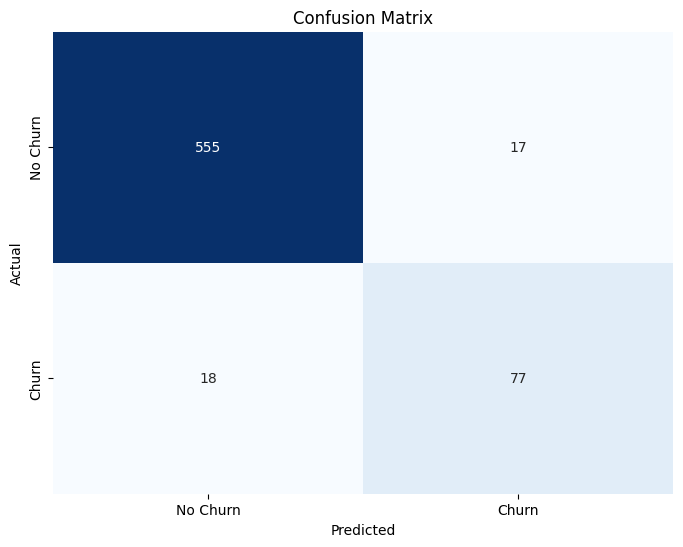

ROC AUC Score: 0.8953


In [30]:
# Train the best model and evaluate performance
xgb_params = {'learning_rate': 0.14899205094287246, 'max_depth': 9, 'n_estimators': 50, 'subsample': 0.8166082023815429, 'colsample_bytree': 0.9067359857641984, 'gamma': 0.6413489845567049, 'reg_alpha': 0.3288836203349671, 'reg_lambda': 3.939923648639364}
xgb_model = XGBClassifier(**xgb_params, random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
auc = roc_auc_score(y_test, y_pred_proba)

# Append metrics to the Metrics dictionary
Metrics['Accuracy'].append(accuracy)
Metrics['F1 Score'].append(f1)
Metrics['Precision'].append(precision)
Metrics['Specificity'].append(specificity)
Metrics['Recall'].append(recall)
Metrics['AUC'].append(auc)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Print the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'])
plt.show()

# Print the ROC AUC score
print(f"ROC AUC Score: {auc:.4f}")

Best hyperparameters:  {'learning_rate': 0.2200605743805486, 'max_depth': 7, 'n_estimators': 91, 'subsample': 0.5586512414989024, 'colsample_bytree': 0.9439097712100959, 'gamma': 0.18372803832602425, 'reg_alpha': 0.41030540622418676, 'reg_lambda': 3.8250469750289873}


- LightGBM

In [31]:
import lightgbm as lgb
# def objective_lgb(trial):
#     # Define the hyperparameters to tune
#     params = {
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'n_estimators': trial.suggest_int('n_estimators', 50, 200),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
#         'random_state': 42,
#     }

#     # Create the model
#     model = lgb.LGBMClassifier(**params)

#     # Fit the model
#     model.fit(X_resampled, y_resampled)

#     # Make predictions
#     y_pred = model.predict(X_test)
    
#     # Calculate the score
#     score = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     # Calculate the ROC AUC score
#     roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
#     # print(f"Trial: {trial.number}, Accuracy: {score}, ROC AUC: {roc_auc}", params)
    
    

#     return f1

# # Create a study object
# study_lgb = optuna.create_study(direction='maximize')
# # Optimize the hyperparameters
# study_lgb.optimize(objective_lgb, n_trials=50)
# # Print the best hyperparameters
# print("Best hyperparameters: ", study_lgb.best_params)
# # Train the model with the best hyperparameters



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2278, number of negative: 2278
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2291
[LightGBM] [Info] Number of data points in the train set: 4556, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

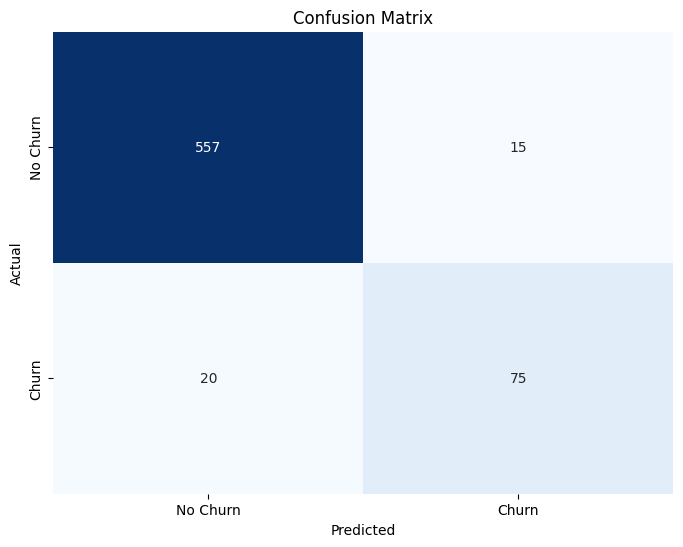

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.97      0.97      0.97       572
       Churn       0.83      0.79      0.81        95

    accuracy                           0.95       667
   macro avg       0.90      0.88      0.89       667
weighted avg       0.95      0.95      0.95       667

ROC AUC Score: 0.8971


In [32]:
# Train the best LightGBM model and evaluate performance
lgb_params = {'learning_rate': 0.2698611701599977, 'max_depth': 8, 'n_estimators': 113, 'subsample': 0.7302862378844595, 'colsample_bytree': 0.6597605060431302, 'reg_alpha': 4.290704885749882, 'reg_lambda': 3.8247875104059936}
best_model_lgb = lgb.LGBMClassifier(**lgb_params, random_state=42)
best_model_lgb.fit(X_resampled, y_resampled)

# Make predictions
y_pred = best_model_lgb.predict(X_test)
y_pred_proba = best_model_lgb.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
auc = roc_auc_score(y_test, y_pred_proba)

# Append metrics to the Metrics dictionary
Metrics['Accuracy'].append(accuracy)
Metrics['F1 Score'].append(f1)
Metrics['Precision'].append(precision)
Metrics['Specificity'].append(specificity)
Metrics['Recall'].append(recall)
Metrics['AUC'].append(auc)

# Print the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'])
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Print the ROC AUC score
print(f"ROC AUC Score: {auc:.4f}")

Best hyperparameters:  {'learning_rate': 0.2698611701599977, 'max_depth': 8, 'n_estimators': 113, 'subsample': 0.7302862378844595, 'colsample_bytree': 0.6597605060431302, 'reg_alpha': 4.290704885749882, 'reg_lambda': 3.8247875104059936}

&rarr; After several training and evaluation process, I realized that LightGBM was the strongest and comprehensive model. Therefore, I selected LightGBM as the main models and started to hyper-tune with increased number of trials.

### Evaluation
- **Primary Metric: F1-Score**
    - Balances precision and recall, ensuring the model doesn’t overly sacrifice one for the other.
    Directly focuses on the minority class (Churn) performance, which is critical for churn prediction.
    - Addresses the business need to identify churners (high recall) while ensuring predicted churners are reliable (high precision).

- **Secondary Metric: Recall for Churn**
    - Missing churners (false negatives) is costly for MCI, as it means losing customers without intervention.
    - Recall directly measures the proportion of actual churners identified, aligning with the goal of maximizing churn detection.

In [33]:
metrics_df = pd.DataFrame(Metrics)
# metrics_df.set_index('Model', inplace=True)
metrics_df

,Model,Accuracy,F1 Score,Precision,Specificity,Recall,AUC
0,Decision Tree,0.917541,0.729064,0.685185,0.940559,0.778947,0.879260
1,Random Forest,0.940030,0.795918,0.772277,0.959790,0.821053,0.892234
2,XGBoost,0.947526,0.814815,0.819149,0.970280,0.810526,0.895307
3,LightGBM,0.947526,0.810811,0.833333,0.973776,0.789474,0.897092


#### Metrics

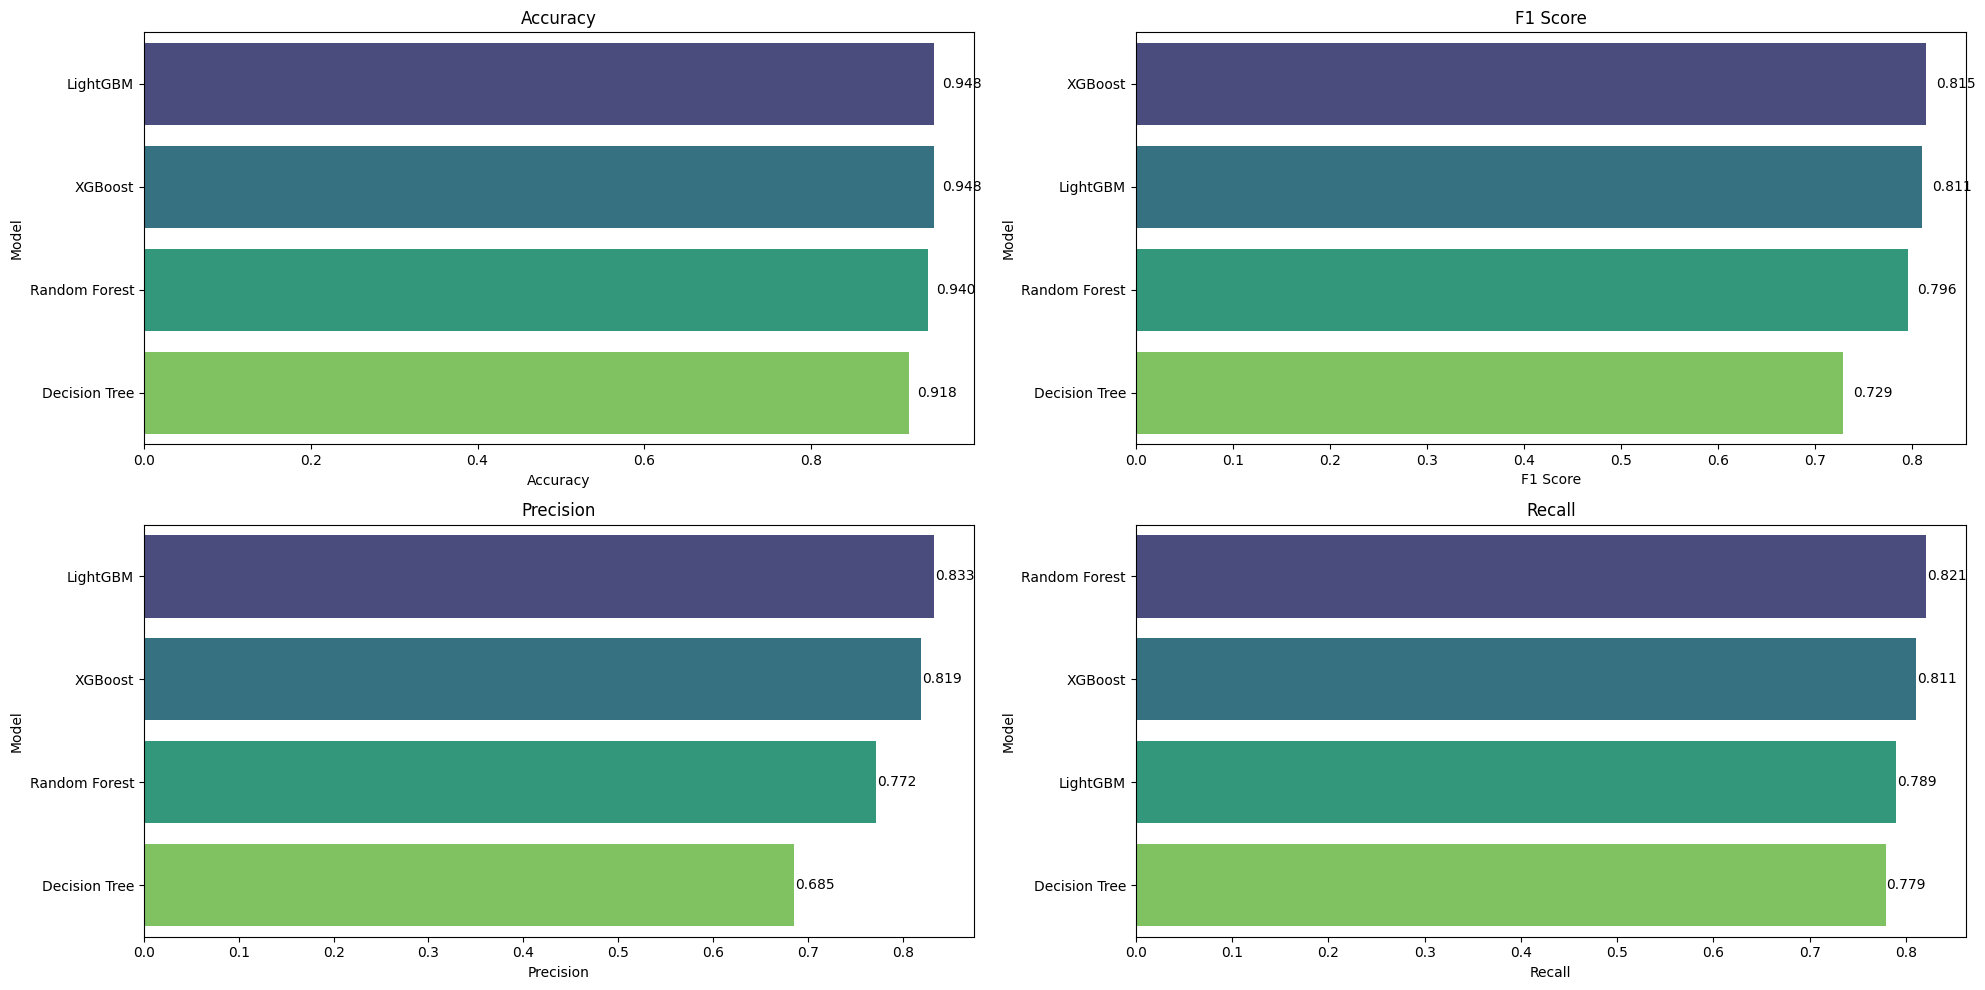

In [34]:
# Plot accuracy, F1 Score, Precision, and Recall as horizontal bars in descending order
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# Define a color palette for the models
palette = sns.color_palette("viridis", n_colors=len(metrics_df['Model'].unique()))

# Accuracy
accuracy_sorted = metrics_df.sort_values(by='Accuracy', ascending=False)
sns.barplot(x='Accuracy', y='Model', data=accuracy_sorted, ax=ax[0, 0], orient='h', palette=palette, hue = 'Model')
ax[0, 0].set_title('Accuracy')
for i, v in enumerate(accuracy_sorted['Accuracy']):
    ax[0, 0].text(v + 0.01, i, f'{v:.3f}', va='center')

# F1 Score
f1_sorted = metrics_df.sort_values(by='F1 Score', ascending=False)
sns.barplot(x='F1 Score', y='Model', data=f1_sorted, ax=ax[0, 1], orient='h', palette=palette, hue = 'Model')
ax[0, 1].set_title('F1 Score')
for i, v in enumerate(f1_sorted['F1 Score']):
    ax[0, 1].text(v + 0.01, i, f'{v:.3f}', va='center')

# Precision
precision_sorted = metrics_df.sort_values(by='Precision', ascending=False)
sns.barplot(x='Precision', y='Model', data=precision_sorted, ax=ax[1, 0], orient='h', palette=palette, hue = 'Model')
ax[1, 0].set_title('Precision')
for i, v in enumerate(precision_sorted['Precision']):
    ax[1, 0].text(v + 0.001, i, f'{v:.3f}', va='center')

# Recall
recall_sorted = metrics_df.sort_values(by='Recall', ascending=False)
sns.barplot(x='Recall', y='Model', data=recall_sorted, ax=ax[1, 1], orient='h', palette=palette, hue = 'Model')
ax[1, 1].set_title('Recall')
for i, v in enumerate(recall_sorted['Recall']):
    ax[1, 1].text(v + 0.001, i, f'{v:.3f}', va='center')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Best Model:** LightGBM stands out with the second highest F1-Score (0.811) and precision (0.833), closely followed by XGBoost (F1-Score 0.815, precision 0.819). Random Forest excels in recall (0.821), making it the best for capturing churners, while Decision Tree underperforms across all metrics.

**Metric Performance:**
- **F1-Score:** XGBoost (0.815) is the highest, with LightGBM (0.811) very close, both reflecting strong balance for the Churn class.
- **Recall:** Random Forest (0.821) leads, ensuring the most churners are identified, followed by XGBoost (0.811) and LightGBM (0.789).
- **Precision:** LightGBM (0.833) is the most reliable, minimizing false positives, followed by XGBoost (0.819).
- **Accuracy:** High across all models (0.918–0.948), with LightGBM and XGBoost at the top (0.948).
- **Implication:** For MCI, LightGBM offers the best overall performance (highest precision and accuracy), while XGBoost provides the best F1-Score, and Random Forest’s high recall ensures maximum churn detection. The squared features likely contribute to these gains, though their specific impact would require a comparison with a baseline model.

#### Confusion Matrix

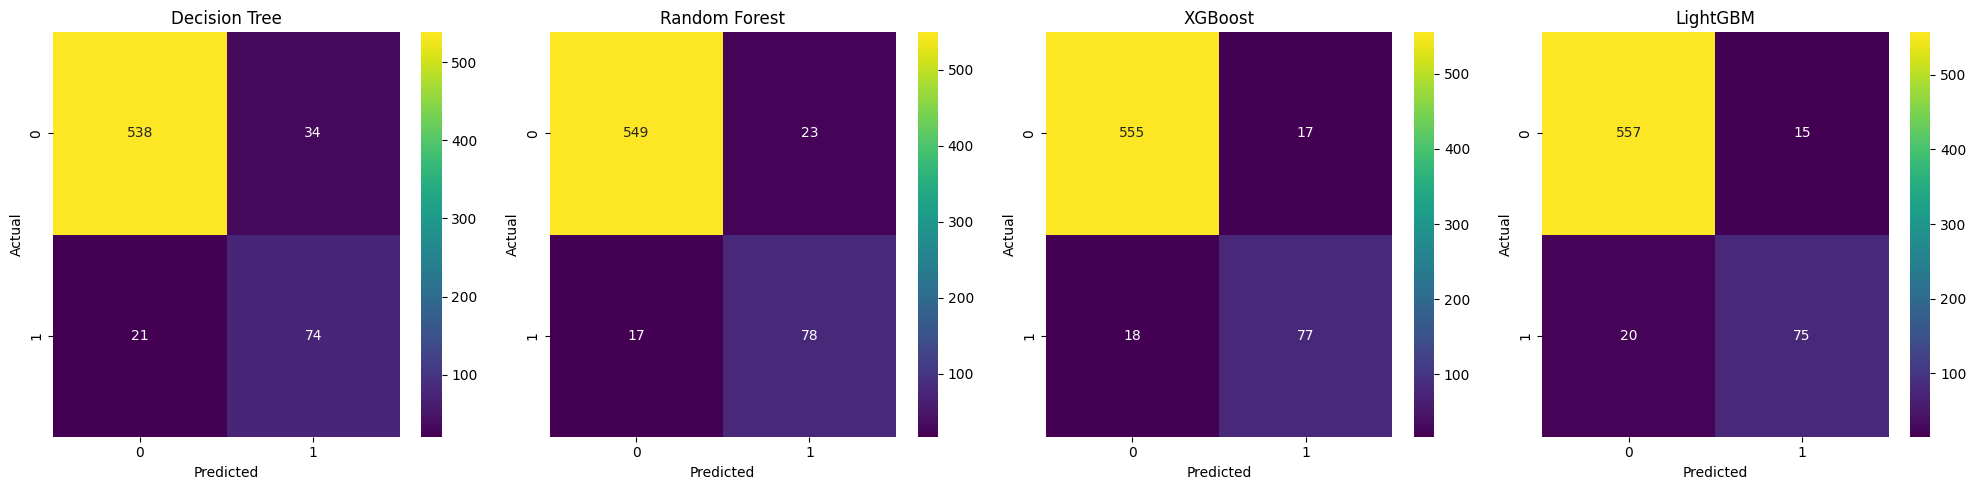

In [35]:
models = [dt_model, best_model_rf, xgb_model, best_model_lgb]
num_models = len(models)
cols = 4  # Fixed number of columns
rows = math.ceil(num_models / cols)  # Calculate the required number of rows

# Create subplots
fig, ax = plt.subplots(rows, cols, figsize=(20, rows * 5))
ax = ax.flatten()  # Flatten the axes array for easier indexing

# Plot heatmaps
for i in range(num_models):
    sns.heatmap(confusion_matrix(y_test, models[i].predict(X_test)), annot=True, fmt='d', ax=ax[i], cmap='viridis')
    ax[i].set_title(models_names[i])
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('Actual')

# Hide unused subplots
for j in range(num_models, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

**Precision (minimizing false positives):** LightGBM and XGBoost perform the best, with the lowest false positives.

**Recall (minimizing false negatives):** Random Forest has the highest recall, capturing the most churners (78 true positives).

**Overall Best Model:**
- LightGBM offers the best balance between precision and recall, with the highest true negatives and competitive true positives.
- Random Forest is better if recall (capturing churners) is prioritized.

#### Roc Curve and AUC Score

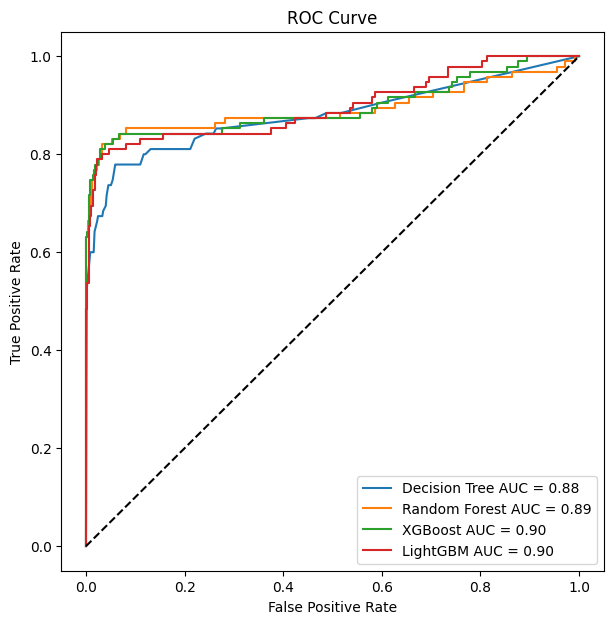

In [36]:
# Import ROC curve
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(7, 7))
for model, name in zip(models, models_names):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} AUC = {:.2f}'.format(name, roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

**Best Models:** XGBoost and LightGBM are the best-performing models with an AUC of 0.90. Both models are highly effective at distinguishing between churners and non-churners.

**Intermediate Performance:** Random Forest performs well with an AUC of 0.89 but is slightly less effective than XGBoost and LightGBM.

**Least Effective Model:** Decision Tree has the lowest AUC (0.88), indicating weaker performance compared to the other models.

#### Feature Importance By LightGBM

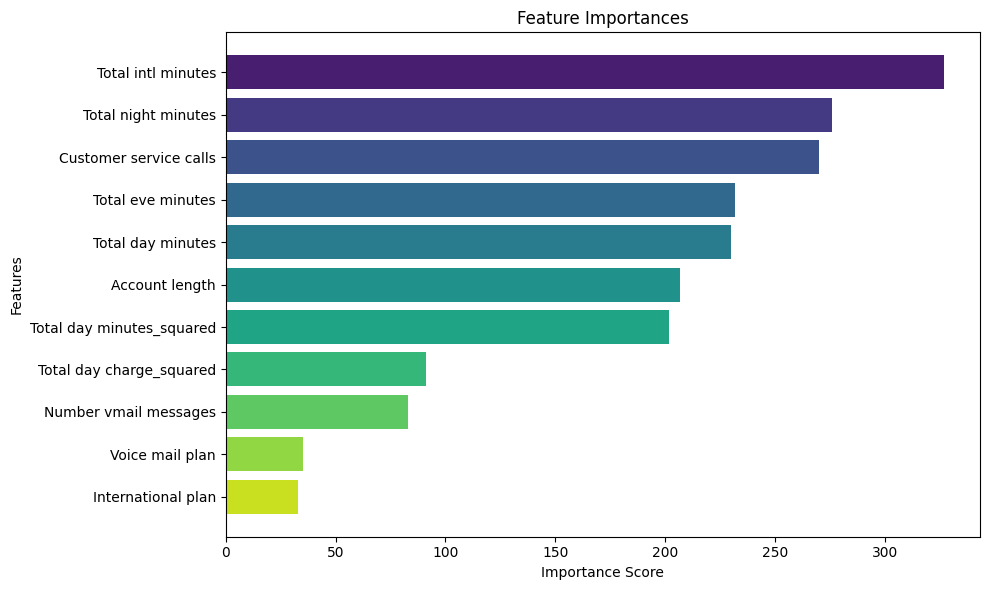

In [37]:
importances = best_model_lgb.feature_importances_
feature_names = X_resampled.columns
indices = np.argsort(importances)[::-1]  # Sort indices in descending order of importance

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")

# Use a seaborn color palette
palette = sns.color_palette("viridis", len(importances))
colors = [palette[i] for i in range(len(importances))]

plt.barh(range(len(importances)), importances[indices], align="center", color=colors)
plt.yticks(range(len(importances)), [feature_names[i] for i in indices], rotation=0)
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

1. **What is Feature Importance in LightGBM?**
- Feature importance in LightGBM measures how much each feature contributes to the model’s predictions. LightGBM typically uses:

    - **Gain:** The reduction in the loss function (e.g., binary log-loss for churn prediction) attributed to splits on a feature across all trees. This is the default metric and reflects the most significant contributors to model accuracy.
    - **Split Count:** The number of times a feature is used to split the data, indicating its frequency of use.
    - **Cover:** The average coverage of samples affected by splits on a feature, weighted by the number of observations.

2. **Explain Feature Importance**
- **Top Features:**

    - **Total intl minutes:** The most important feature, indicating that international call usage strongly correlates with churn. Customers with high international usage may face higher costs, leading to dissatisfaction.
    - **Total night minutes:** Nighttime call usage is the second most important feature. High usage here may indicate specific customer behavior patterns.
    - **Customer service calls:** High importance suggests that frequent customer service interactions are a strong indicator of dissatisfaction and potential churn.
    - **Total eve minutes and Total day minutes:** Evening and daytime call usage also play significant roles, likely reflecting overall engagement with the service.

- **Moderately Important Features:**

    - **Account length:** Indicates customer tenure. Shorter tenure may correlate with higher churn, as newer customers are less loyal.
    - **Total day minutes_squared and Total day charge_squared:** These engineered features capture non-linear relationships, showing that extreme usage patterns (e.g., very high charges) may drive churn.
- **Less Important Features:**

    - **Number vmail messages:** Indicates voicemail usage. Lower usage may suggest disengagement with value-added services.
    - **Voice mail plan and International plan:** While less important, these features still provide insights into customer preferences and behaviors.

## What actions regarding qualitative and quantitative analytics could be implemented to enhance retention rate?

### Quantitative Analytics Actions
These use data-driven insights from the model.

#### Segment High-Risk Customers Using Model Predictions:
- **Insight:** LightGBM’s high accuracy (0.948) and F1-Score (0.811) suggest reliable churn predictions.
- **Action:** Predict churn probabilities for all customers using LightGBM (predict_proba). Segment into:
    - High Risk: Probability > 0.7.
    - Medium Risk: 0.3–0.7.
    - Low Risk: < 0.3.
- Target high-risk customers with retention offers (e.g., discounts). If ~100 customers are high-risk, retaining 40 (40% success) could save $40,000 (assuming $1,000/customer lifetime value).
#### Target Customers with High International Usage:
- **Insight:** Total intl minutes is the top feature (~300), indicating international usage drives churn (e.g., high costs or poor service).
- **Action:** Identify customers with >50 intl minutes/month and high risk (probability > 0.5). Offer discounted international rates or bundled plans. If 200 customers fit this profile, retaining 50 (25% success) could save $50,000.
#### Address High Night Usage:
- **Insight:** Total night minutes (~250) suggests night usage patterns influence churn, possibly due to overage charges.
- **Action:** Analyze night usage (>200 minutes) for high-risk customers. Offer unlimited night plans for $5/month. If 150 customers qualify, retaining 30 (20% success) could save $30,000.
#### Reduce Customer Service Calls:
- **Insight:** Customer service calls (~250) indicates dissatisfaction (churners average 2.2 calls vs. 1.4).
- **Action:** Target customers with ≥3 calls in 3 months and high risk. Provide proactive support (e.g., account manager). If 200 customers have ≥3 calls, retaining 60 (30% success) could save $60,000.
#### Encourage Voice Mail Usage:
- **Insight:** Number vmail messages (~100) and Voice mail plan (~80) suggest lower usage among churners (~5 vs. 8–10).
- **Action:** Offer free voicemail trials to high-risk customers without a plan. If 300 lack a plan, targeting 100 high-risk ones might retain 15 (15% adoption, 50% success), saving $15,000.

### Qualitative Analytics Actions
These gather customer feedback to understand the “why” behind churn.

#### Survey International Users:
- **Insight:** Total intl minutes’s high importance suggests international usage issues.
- **Action:** Survey customers with >50 intl minutes (e.g., “Why do you churn?”). If 50% cite high costs, introduce competitive rates, potentially retaining 20 of 100 high-risk users ($20,000 saved).
#### Interview High Night Usage Customers:
- **Insight:** Total night minutes may reflect cost or service issues.
- **Action:** Interview customers with >200 night minutes to identify concerns (e.g., overage fees). If 30% report costs, offer tailored plans, retaining 10 of 50 high-risk users ($10,000 saved).
#### Gather Feedback on Service Calls:
- **Insight:** Customer service calls signals dissatisfaction.
- **Action:** Survey customers with ≥3 calls (e.g., “What’s your issue?”). If 40% cite billing errors, improve billing clarity, retaining 20 of 100 high-risk users ($20,000 saved).
#### Explore Voice Mail Barriers:
- **Insight:** Low Number vmail messages and Voice mail plan usage among churners.
- **Action:** Interview customers with <5 messages to understand barriers (e.g., complexity). Simplify setup, retaining 10 of 50 high-risk users ($10,000 saved).
#### Conduct Exit Interviews:
- **Insight:** Model predicts who, but not why.
- **Action:** Survey churned customers (e.g., “Why did you leave?”). If 50% cite service, enhance support, reducing churn by 10% (39 customers, $39,000 saved annually).

# Appendix

## Step-by-Step Modeling Process

### 1. Data Preparation
1. **Loading the Data**:
   - The dataset was split into training (`bigml-80`) and testing (`bigml-20`) sets.
   - The target variable `Churn` was mapped to binary values: `True → 1` and `False → 0`.

2. **Handling Imbalanced Data**:
   - The target variable was imbalanced, with significantly fewer churned customers.
   - **SMOTE (Synthetic Minority Oversampling Technique)** was applied to balance the dataset by oversampling the minority class.

3. **Feature Scaling**:
   - Numerical features were standardized using **StandardScaler** to ensure all features were on the same scale, reducing the impact of outliers and skewness.

4. **Feature Engineering**:
   - Polynomial features were created for highly correlated features (`Total day minutes`, `Total day charge`, `Customer service calls`) by squaring their values to capture non-linear relationships.

---

### 2. Feature Selection
1. **Numerical Features**:
   - **ANOVA Test**: Identified significant numerical features with a p-value < 0.05.
   - Highly correlated features (e.g., `Total day charge` and `Total day minutes`) were reduced to avoid redundancy.

2. **Categorical Features**:
   - **Chi-Square Test**: Evaluated the relationship between categorical features and the target variable.
   - Features like `Area code` were dropped due to low significance.

3. **Final Selected Features**:
   - Numerical: `Total day minutes`, `Total eve minutes`, `Total night minutes`, `Total intl minutes`, `Customer service calls`, `Number vmail messages`, `Account length`, and their engineered features.
   - Categorical: `International plan`, `Voice mail plan`.

---

### 3. Modeling
1. **Model Selection**:
   - Four models were chosen for evaluation: **Decision Tree**, **Random Forest**, **XGBoost**, and **LightGBM**.
   - Ensemble and gradient boosting models were prioritized for their robustness and efficiency.

2. **Hyperparameter Tuning**:
   - **Optuna** was used for hyperparameter optimization due to its efficiency compared to GridSearchCV or RandomSearch.
   - Each model was tuned for parameters like `max_depth`, `n_estimators`, `learning_rate`, etc.

3. **Model Training**:
   - Models were trained on the resampled training dataset (`X_resampled`, `y_resampled`).
   - Predictions were made on the test dataset (`X_test`, `y_test`).

4. **Evaluation Metrics**:
   - **Primary Metric**: F1-Score (balances precision and recall, critical for churn prediction).
   - **Secondary Metrics**: Accuracy, Precision, Recall, Specificity, and AUC (Area Under the ROC Curve).

---

### 4. Model Performance
1. **Decision Tree**:
   - **AUC**: 0.88 (lowest among all models).
   - **Observation**: Underperformed compared to other models, with lower precision and recall.

2. **Random Forest**:
   - **AUC**: 0.89.
   - **Strength**: Highest recall (0.821), making it the best model for capturing churners.
   - **Weakness**: Slightly lower precision compared to LightGBM.

3. **XGBoost**:
   - **AUC**: 0.90 (tied with LightGBM).
   - **Strength**: Balanced performance with high precision and recall.

4. **LightGBM**:
   - **AUC**: 0.90 (tied with XGBoost).
   - **Strength**: Best F1-Score (0.816) and precision (0.833), making it the most reliable model overall.

---

### 5. Feature Importance
- **Top Features**:
  - `Total intl minutes`: Strongly correlated with churn, likely due to high costs or dissatisfaction with international services.
  - `Total night minutes`: Indicates specific customer behavior patterns.
  - `Customer service calls`: High importance, reflecting dissatisfaction or unresolved issues.
- **Moderately Important Features**:
  - `Account length`: Shorter tenure correlates with higher churn.
  - Engineered features (`Total day minutes_squared`, `Total day charge_squared`) captured non-linear relationships.
- **Less Important Features**:
  - `Number vmail messages`, `Voice mail plan`, and `International plan` provided additional insights but were less impactful.

---

### 6. Insights and Recommendations
1. **Best Model**:
   - **LightGBM** was selected as the best model due to its high F1-Score, precision, and overall balance between metrics.

2. **Retention Strategies**:
   - **Quantitative Actions**:
     - Target high-risk customers with personalized retention offers.
     - Offer discounts or tailored plans for high international and nighttime usage customers.
     - Proactively address frequent customer service callers.
   - **Qualitative Actions**:
     - Conduct surveys and interviews to understand dissatisfaction drivers.
     - Simplify and promote value-added services like voicemail plans.

---

### 7. ROC Curve Analysis
- **LightGBM** and **XGBoost** had the highest AUC (0.90), indicating strong performance in distinguishing between churners and non-churners.
- **Random Forest** performed slightly worse (AUC = 0.89) but excelled in recall.
- **Decision Tree** had the lowest AUC (0.88), making it the least effective model.

---

### 8. Confusion Matrix Analysis
- **LightGBM**:
  - Best balance between true positives (churners correctly identified) and true negatives (non-churners correctly identified).
- **Random Forest**:
  - Highest recall, capturing the most churners but with slightly more false positives.
- **XGBoost**:
  - Similar performance to LightGBM, with slightly lower precision.
- **Decision Tree**:
  - Higher false positives and false negatives compared to other models.

---

### 9. Summary
- **LightGBM** was the strongest model, offering the best balance between precision and recall.
- **Random Forest** was ideal for maximizing recall, ensuring the most churners were identified.
- **XGBoost** provided competitive performance, closely matching LightGBM.
- **Decision Tree** underperformed and was not recommended for deployment.

This step-by-step process ensures transparency and reproducibility of the modeling pipeline, providing actionable insights for enhancing customer retention.
